In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer as regextoken
from nltk import FreqDist, bigrams, trigrams
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import nltk
nltk.download('stopwords');
nltk.download('punkt')
from nltk import word_tokenize
from nltk import punkt
stop_words = set(stopwords.words("english"))
nltk.download('wordnet')
wnl = WordNetLemmatizer()
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\h19baman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\h19baman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\h19baman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\h19baman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
#configure Pandas to display all 23 columns
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
#show only two decimal places
pd.set_option("display.precision", 2)

In [3]:
rating = pd.read_csv("Ratings.csv")

In [4]:
rating.dropna(axis=0,inplace=True)

In [5]:
list(rating)

['name', 'rating', 'review', 'votes', 'restaurant_type', 'location']

In [6]:
rating['review']= rating['review'].str.replace('[^a-zA-Z#]+',' ')

In [7]:
rating['review'] = rating['review'].str.lower()

In [8]:
rating['review'] = rating['review'].apply(
    lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [9]:
rating['review']=rating.review.apply(lambda row: word_tokenize(row))

In [12]:
rating['review'].head()

0    [beautiful, place, dine, inthe, interiors, tak...
1    [here, dinner, with, family, weekday, restaura...
2    [restaurant, near, banashankari, along, with, ...
3    [went, here, weekend, buffet, while, took, car...
4    [best, thing, about, place, ambiance, second, ...
Name: review, dtype: object

In [13]:
rating['review'] = rating['review'].apply(lambda x: [item for item in x if item not in stop_words])

In [14]:
rating['review'][300:400]

300    [pizza, shake, salad, nice, location, barrys, ...
301    [stopped, place, board, door, saying, free, of...
302    [worst, restaurant, ever, manchurian, worth, d...
303    [sorry, people, lack, hygiene, upload, photo, ...
304    [worst, ever, chicken, biriyani, ordered, plai...
305    [dear, team, unable, order, late, night, good,...
306                                               [good]
307                                        [worst, food]
308                                        [worst, food]
309    [small, chicken, piece, zomato, fooled, showin...
310                            [panner, tasteless, hard]
311                                               [food]
312                                     [pathetic, food]
313    [chocolate, milk, shake, upto, markit, didnt, ...
314                                               [nice]
315    [throw, french, fries, ordered, burnt, type, u...
316    [restaurant, includes, coke, combos, fails, gi...
317                            

In [15]:
rating['review'] = rating['review'].apply(lambda x: [wnl.lemmatize(i) for i in x ])

In [16]:
def removeNull(wrdList):

     for wrd in wrdList :
         if wrd == '':
             wrdList.remove(wrd)
     return wrdList
            
rating['review'] = rating['review'].apply(lambda x: removeNull(x))

In [17]:
def checkEmpty(stringVal):
    if not stringVal:
        return True
    else :
        return False
    
rating['review_b'] = rating['review'].apply(lambda x: checkEmpty(x))

In [18]:
rating['review'][300:400]

300    [pizza, shake, salad, nice, location, barrys, ...
301    [stopped, place, board, door, saying, free, of...
302    [worst, restaurant, ever, manchurian, worth, d...
303    [sorry, people, lack, hygiene, upload, photo, ...
304    [worst, ever, chicken, biriyani, ordered, plai...
305    [dear, team, unable, order, late, night, good,...
306                                               [good]
307                                        [worst, food]
308                                        [worst, food]
309    [small, chicken, piece, zomato, fooled, showin...
310                            [panner, tasteless, hard]
311                                               [food]
312                                     [pathetic, food]
313    [chocolate, milk, shake, upto, markit, didnt, ...
314                                               [nice]
315    [throw, french, fry, ordered, burnt, type, use...
316    [restaurant, includes, coke, combo, fails, giv...
317                            

In [19]:
rating1=rating[rating['review_b']==False]

In [20]:
rating1[rating1['review_b']==False][300:400]

,name,rating,review,votes,restaurant_type,location,review_b
300,Redberrys,5.0,"[pizza, shake, salad, nice, location, barrys, ...",219,Cafes,Basavanagudi,False
301,Redberrys,5.0,"[stopped, place, board, door, saying, free, of...",219,Cafes,Basavanagudi,False
302,Foodiction,1.0,"[worst, restaurant, ever, manchurian, worth, d...",506,Delivery,Banashankari,False
303,Foodiction,1.0,"[sorry, people, lack, hygiene, upload, photo, ...",506,Delivery,Banashankari,False
304,Foodiction,1.0,"[worst, ever, chicken, biriyani, ordered, plai...",506,Delivery,Banashankari,False
305,Foodiction,4.0,"[dear, team, unable, order, late, night, good,...",506,Delivery,Banashankari,False
306,Foodiction,5.0,[good],506,Delivery,Banashankari,False
307,Foodiction,1.0,"[worst, food]",506,Delivery,Banashankari,False
308,Foodiction,1.0,"[worst, food]",506,Delivery,Banashankari,False
309,Foodiction,1.0,"[small, chicken, piece, zomato, fooled, showin...",506,Delivery,Banashankari,False


In [21]:
rating1['review'][300:400]

300    [pizza, shake, salad, nice, location, barrys, ...
301    [stopped, place, board, door, saying, free, of...
302    [worst, restaurant, ever, manchurian, worth, d...
303    [sorry, people, lack, hygiene, upload, photo, ...
304    [worst, ever, chicken, biriyani, ordered, plai...
305    [dear, team, unable, order, late, night, good,...
306                                               [good]
307                                        [worst, food]
308                                        [worst, food]
309    [small, chicken, piece, zomato, fooled, showin...
310                            [panner, tasteless, hard]
311                                               [food]
312                                     [pathetic, food]
313    [chocolate, milk, shake, upto, markit, didnt, ...
314                                               [nice]
315    [throw, french, fry, ordered, burnt, type, use...
316    [restaurant, includes, coke, combo, fails, giv...
317                            

In [22]:
stemming = PorterStemmer()

In [23]:
rating1['review']=rating1['review'].apply(lambda x: ' '.join([word for word in x]))

C:\Users\h19baman\Anaconda3\envs\Bussiness intelligence\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
rating1.reset_index(drop=True,inplace=True)

In [25]:
rating = rating1.drop(["review_b"],axis=1)

In [27]:
rating.review.head(100)

0     beautiful place dine inthe interior take back ...
1     dinner family weekday restaurant completely em...
2     restaurant near banashankari along office frie...
3     went weekend buffet took carte firstly ambienc...
4     best thing place ambiance second best thing yu...
5     great food pleasant ambience expensive coll pl...
6     good ambience tasty food cheese chilli paratha...
7     cant wrong jalsa never buffet thus always orde...
8     overdelighted service food provided place roya...
9     place nice comfortable food wise jalea outlet ...
10    place nice comfortable food wise jalea outlet ...
11    place nice comfortable food wise jalea outlet ...
12    dinner family turned good choose suitable age ...
13    ambience really nice staff courteous price pre...
14    felt good little expensive quantity serve term...
15    looking quite place spend time family well wan...
16    nice place dine good ambiance food good servin...
17    place cool good ambience slow music delici

## Let's do the Sentiment Analysis

In [28]:
rating['Sentiment Scores'] = rating['review'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [29]:
rating.review.head()

0    beautiful place dine inthe interior take back ...
1    dinner family weekday restaurant completely em...
2    restaurant near banashankari along office frie...
3    went weekend buffet took carte firstly ambienc...
4    best thing place ambiance second best thing yu...
Name: review, dtype: object

In [30]:
rating['Sentiment Scores'].unique()

array([ 0.7351,  0.9701,  0.5423, ..., -0.4843,  0.6027,  0.3639])

In [31]:
rating['Sentiment'] = rating['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [32]:
rating.head()

,name,rating,review,votes,restaurant_type,location,Sentiment Scores,Sentiment
0,Jalsa,4.0,beautiful place dine inthe interior take back ...,775,Buffet,Banashankari,0.74,Positive
1,Jalsa,4.0,dinner family weekday restaurant completely em...,775,Buffet,Banashankari,0.97,Positive
2,Jalsa,2.0,restaurant near banashankari along office frie...,775,Buffet,Banashankari,0.54,Positive
3,Jalsa,4.0,went weekend buffet took carte firstly ambienc...,775,Buffet,Banashankari,0.97,Positive
4,Jalsa,5.0,best thing place ambiance second best thing yu...,775,Buffet,Banashankari,0.95,Positive


In [33]:
rating['Sentimentpoints'] = rating['Sentiment'].apply(lambda s : 1 if s == 'Positive' else (0 if s == 'Neutral' else -1))

In [34]:
rating['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [35]:
rating['Sentimentpoints'].unique()

array([ 1, -1,  0], dtype=int64)

In [36]:
rating['Sentiment'].value_counts()

Positive    942936
Negative     88605
Neutral      39143
Name: Sentiment, dtype: int64

In [38]:
rating['Sentimentpoints'].value_counts()

 1    942936
-1     88605
 0     39143
Name: Sentimentpoints, dtype: int64

In [65]:
rating.to_csv("Ratingssenti.csv",index=False)

In [66]:
rating2 = pd.read_csv("Ratingssenti.csv")

In [68]:
rating2

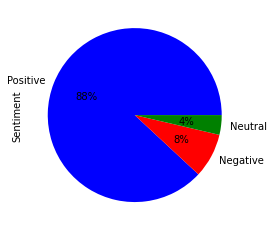

In [87]:
rating.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["blue", "red", "green"])

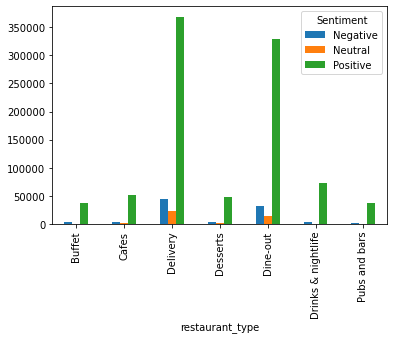

In [40]:
rating_set = rating.groupby(['restaurant_type', 'Sentiment']).Sentiment.count().unstack()
rating_set.plot(kind='bar')

In [42]:
rating['review'].head()

0    beautiful place dine inthe interior take back ...
1    dinner family weekday restaurant completely em...
2    restaurant near banashankari along office frie...
3    went weekend buffet took carte firstly ambienc...
4    best thing place ambiance second best thing yu...
Name: review, dtype: object

## CON 

In [44]:
# Converting all the text to lowercase
rating["reviews_list"] = rating["review"].apply(lambda x: x.lower())

# Creating a regular expression tokenizer that matches only alphabets
# This will return separate words (tokens) from the text
tokenizer = regextoken("[a-zA-Z]+") 
# Applying the tokenizer to each row of the reviews
review_tokens = rating["reviews_list"].apply(tokenizer.tokenize)
# Examining the tokens created for the first row / restaurant

In [45]:
review_tokens.head()

0    [beautiful, place, dine, inthe, interior, take...
1    [dinner, family, weekday, restaurant, complete...
2    [restaurant, near, banashankari, along, office...
3    [went, weekend, buffet, took, carte, firstly, ...
4    [best, thing, place, ambiance, second, best, t...
Name: reviews_list, dtype: object

In [46]:
# # Adding custom words to stopwords 
# stop_words.extend(["rated", "n", "nan", "x"])
# Removing stopwords from the tokens
review_tokens = review_tokens.apply(lambda x: [token for token in x if token not in stop_words])
# Concatenating all the reviews 
all_reviews = review_tokens.astype(str).str.cat()
cleaned_reviews = tokenizer.tokenize(all_reviews)

# Getting the frequency distribution of individual words in the reviews
fd = FreqDist()
for word in cleaned_reviews:
    fd[word] += 1
    
# Examining the top 5 most frequent words

In [47]:
fd.most_common(20)

[('place', 931897),
 ('food', 855781),
 ('good', 829888),
 ('service', 369343),
 ('chicken', 351257),
 ('ambience', 302645),
 ('ordered', 272227),
 ('great', 257988),
 ('taste', 243137),
 ('time', 236568),
 ('really', 228768),
 ('also', 207343),
 ('nice', 193504),
 ('staff', 178353),
 ('like', 177284),
 ('visit', 177196),
 ('best', 167411),
 ('well', 159215),
 ('pizza', 157209),
 ('restaurant', 149015)]

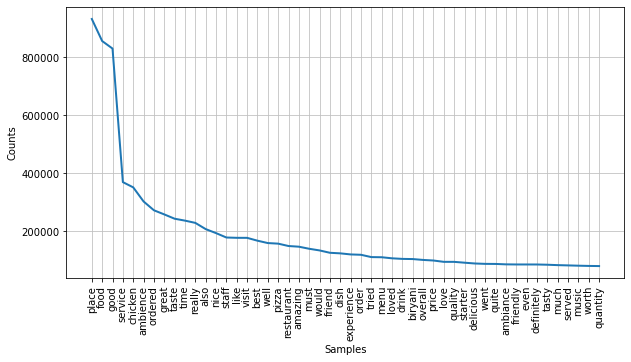

In [48]:
# Plotting the top 50 most frequent words
# fd.title('Frequency plot')
plt.figure(figsize = (10, 5))
fd.plot(50)
# plt.show()
# ab.plot(kind='bar')

In [49]:
review_tokens.head()

0    [beautiful, place, dine, inthe, interior, take...
1    [dinner, family, weekday, restaurant, complete...
2    [restaurant, near, banashankari, along, office...
3    [went, weekend, buffet, took, carte, firstly, ...
4    [best, thing, place, ambiance, second, best, t...
Name: reviews_list, dtype: object

In [64]:
rating.tail()

,name,rating,review,votes,restaurant_type,location,Sentiment Scores,Sentiment,Sentimentpoints,reviews_list
1070679,Chime - Sheraton Grand Bengaluru Whitefield Ho...,1.0,service ordered stella artois gave expired bot...,236,Pubs and bars,"ITPL Main Road, Whitefield",0.87,Positive,1,service ordered stella artois gave expired bot...
1070680,Chime - Sheraton Grand Bengaluru Whitefield Ho...,5.0,nice inside sheraton host friendly helpful ser...,236,Pubs and bars,"ITPL Main Road, Whitefield",0.95,Positive,1,nice inside sheraton host friendly helpful ser...
1070681,Chime - Sheraton Grand Bengaluru Whitefield Ho...,5.0,review based food drink service food food good...,236,Pubs and bars,"ITPL Main Road, Whitefield",0.99,Positive,1,review based food drink service food food good...
1070682,Chime - Sheraton Grand Bengaluru Whitefield Ho...,5.0,visited chime sheraton hotel nice experience m...,236,Pubs and bars,"ITPL Main Road, Whitefield",0.94,Positive,1,visited chime sheraton hotel nice experience m...
1070683,Chime - Sheraton Grand Bengaluru Whitefield Ho...,4.0,restaurant situated inside grand sheraton hote...,236,Pubs and bars,"ITPL Main Road, Whitefield",0.78,Positive,1,restaurant situated inside grand sheraton hote...


In [63]:
rating.shape

(1070684, 10)

In [52]:
X = rating.review
y = rating.Sentimentpoints

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [56]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)

In [57]:
nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)

0.823444367414155

In [58]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(-1, 754393), (0, 754393), (1, 754393)]


In [59]:
X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([-1,  1,  1, ...,  1,  1,  1], dtype=int64)

In [60]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy: 86.87%


In [61]:
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))


COnfusion Matrix:
 [[ 14159   1256   2287]
 [  1144   6189    559]
 [ 19213   3658 165672]]
